In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, 
                                                                    test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras

In [21]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_6 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, batch_size=100, epochs=100, 
          callbacks=[checkpoint_cb, early_stopping_cb],
          validation_data=(val_seq, val_target))

Epoch 1/100
200/200 [==============================] - 7s 27ms/step - loss: 0.6928 - accuracy: 0.5268 - val_loss: 0.6921 - val_accuracy: 0.5508
Epoch 2/100
200/200 [==============================] - 5s 25ms/step - loss: 0.6916 - accuracy: 0.5589 - val_loss: 0.6908 - val_accuracy: 0.5764
Epoch 3/100
200/200 [==============================] - 5s 25ms/step - loss: 0.6900 - accuracy: 0.5834 - val_loss: 0.6888 - val_accuracy: 0.5916
Epoch 4/100
200/200 [==============================] - 5s 25ms/step - loss: 0.6877 - accuracy: 0.6014 - val_loss: 0.6859 - val_accuracy: 0.6052
Epoch 5/100
200/200 [==============================] - 5s 25ms/step - loss: 0.6841 - accuracy: 0.6213 - val_loss: 0.6817 - val_accuracy: 0.6138
Epoch 6/100
200/200 [==============================] - 5s 25ms/step - loss: 0.6786 - accuracy: 0.6331 - val_loss: 0.6756 - val_accuracy: 0.6224
Epoch 7/100
200/200 [==============================] - 5s 25ms/step - loss: 0.6716 - accuracy: 0.6399 - val_loss: 0.6670 - val_accuracy:

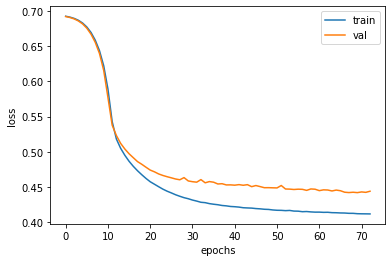

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
test_seq = pad_sequences(test_input, maxlen=100)
model.evaluate(test_seq, test_target)

782/782 [==============================] - 7s 8ms/step - loss: 0.4360 - accuracy: 0.7959


[0.436034619808197, 0.7958800196647644]

In [6]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100))
model.add(keras.layers.GRU(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
